In [3]:
# what is a corner?
# a corner is a junction of 2 edges
# a corner is a change in image brightness

In [40]:
# Harris Corner Detection
# if we are scanning the image with a window 
# no matter what direction we scan
# there will be a change
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
# http://www.cse.psu.edu/~rtc12/CSE486/lecture06.pdf

In [6]:
# Shi Tomasi
# based on Harris but small modification
# changes scoring function selection criteria

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# HARRIS CORNER

In [9]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')

In [10]:
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

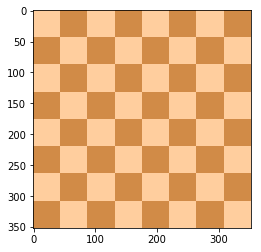

In [11]:
plt.imshow(flat_chess)

In [13]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

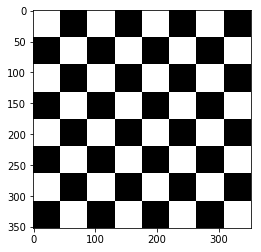

In [14]:
plt.imshow(gray_flat_chess,cmap='gray')

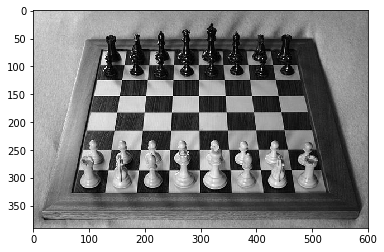

In [31]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_chess,cmap='gray')

In [32]:
gray = np.float32(gray_flat_chess)

In [33]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [34]:
dst = cv2.dilate(dst,None)

In [35]:
flat_chess[dst>0.01*dst.max()] = [255,0,0]

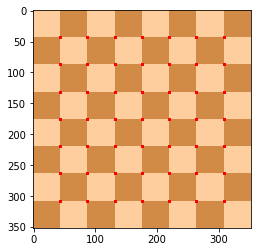

In [36]:
plt.imshow(flat_chess)

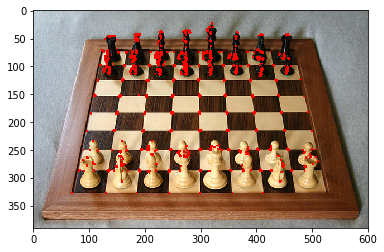

In [74]:
gray = np.float32(gray_chess)
# blocksize is the region to calculate cross correlation matrix
# ksize is the sobel operator is used to calculate derivative
# k is a paramter used in scoring
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)
# dst returns 1 channel of since it is gray scale, applying it to 3 channel picture!
real_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(real_chess)

# SHI-TOMASI

In [41]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

In [48]:
# qualityLevel 0.01 is like the k value
# minDistance 10 
corners = cv2.goodFeaturesToTrack(gray_flat_chess,62,0.01,10)

In [49]:
corners = np.int0(corners)

In [51]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

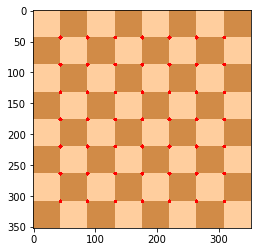

In [52]:
plt.imshow(flat_chess)

In [53]:
corners = cv2.goodFeaturesToTrack(gray_chess,80,0.01,10)

In [73]:
# doesn't return scores like previous algorithm, returns coordinates of corners! 
corners = np.int0(corners)

In [58]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)

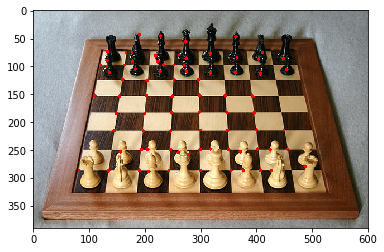

In [59]:
plt.imshow(real_chess)